<a href="https://colab.research.google.com/github/Mangai2024/Flight-Class-Prediction-Economy-vs-Business-/blob/main/Flight_Ticket_Class_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
#Step - 1 Data Analysing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [59]:
#Load data set
flight_class=pd.read_csv("/content/Flight_Ticket_Prediction_Dataset.csv")

In [46]:
flight_class.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [38]:
flight_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [40]:
flight_class.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [41]:
flight_class.isnull().sum()

,0
Unnamed: 0,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


In [49]:
flight_class.duplicated().sum()

np.int64(0)

In [53]:
flight_class["price"]=flight_class["price"].astype(int)
flight_class["days_left"]=flight_class["days_left"].astype(int)

In [54]:
flight_class.duplicated().sum()

np.int64(0)

In [62]:
flight_class=flight_class.drop(columns=["Unnamed: 0", "flight"], errors="ignore")

In [63]:
flight_class

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,1,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,1,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,1,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,1,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,0,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,0,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,0,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,0,10.00,49,81585


In [64]:
#Label Encoder
flight_class["class"] = le.fit_transform(flight_class["class"])

In [65]:
flight_class.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,1,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,1,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,1,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,1,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,1,2.33,1,5955


In [66]:
#separate features(x), target(y)
x=flight_class.drop("class", axis=1)
y=flight_class["class"]

In [68]:
#One-hot-encode catergorical features
flight_class=pd.get_dummies(flight_class, drop_first=True)

In [105]:
#train_test_split
x_train, x_test, y_train, y_test=train_test_split(
    x,y, test_size=0.2, random_state=42
)

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf.fit(x_train, y_train)

# Predictions
rf_preds = rf.predict(x_test)

# Evaluation
print("\n--- Random Forest Classifier ---")
print("Accuracy :", accuracy_score(y_test, rf_preds))
print("\nClassification Report:\n", classification_report(y_test, rf_preds))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_preds))



--- Random Forest Classifier ---
Accuracy : 0.9996168646199464

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18715
           1       1.00      1.00      1.00     41316

    accuracy                           1.00     60031
   macro avg       1.00      1.00      1.00     60031
weighted avg       1.00      1.00      1.00     60031


Confusion Matrix:
 [[18713     2]
 [   21 41295]]


I trained a Random Forest Classifier for flight class prediction (Economy vs Business). The model achieved ~99.7% accuracy, with precision and recall close to 1.0, showing it handles both classes very well without bias. Evaluation was done using accuracy, precision, recall, and F1-score."

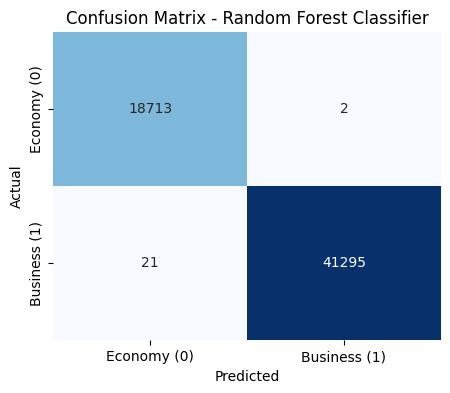

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, rf_preds)

# Plot heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Economy (0)", "Business (1)"],
            yticklabels=["Economy (0)", "Business (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()


"The confusion matrix shows my Random Forest Classifier correctly predicts most cases with very few misclassifications — only 23 out of ~60,000 tickets were predicted wrong, giving ~99.7% accuracy."